# Image Enhancement and Object Detection on Pistols in Luggage
In this project we used a variety of image enhancement methods, and Faster R-CNN architecture for the object detection.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/senior project directory')

In [5]:
# install libraries that aren't included in colab.
!pip install ripser
!pip install detecto

     |████████████████████████████████| 72 kB 400 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 47 kB 4.2 MB/s 
  Created wheel for ripser: filename=ripser-0.6.1-cp37-cp37m-linux_x86_64.whl size=456104 sha256=85ddff463f1415973b9618f6908966d376c5a9cb9f96cf088bc18701fdbef8c1
  Stored in directory: /root/.cache/pip/wheels/6b/e3/c8/209a9df47cc9af8c6d2dbee4db558dc129494d3f4fbd670285
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18120 sha256=f725aff314a9fa395a11a6e0d4dde7651168f1991ad77b783288486eda9975cf
  Stored in directory: /root/.cache/pip/wheels/d2/9f/a8/67f1b86e47cd17338d3d07939f4660378e65b758c4594f96e3
Successfully built ripser hopcroftkarp


In [6]:
# import all neccessary libraries
import TDAimgprocess as TIP
import os
import time
import ripser
import random
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import matplotlib
%matplotlib inline
import PIL
from skimage.segmentation import chan_vese
from skimage.segmentation import slic
from skimage.filters import roberts
from skimage.morphology import convex_hull_image
import skimage.filters as filters
from skimage.segmentation import active_contour 
import cv2
import pandas as pd
from PIL import Image
import scipy.misc
from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from torchvision import transforms

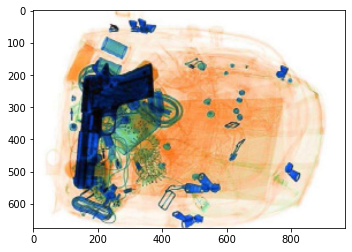

In [29]:
img = mpimg.imread(os.path.join("/content/drive/MyDrive/images to test/image4.JPG"))

plt.imshow(img)
plt.show()


Time for Topological Image Processing: 00:00:05


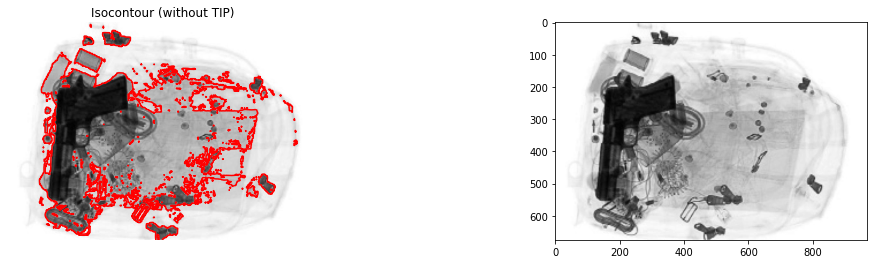

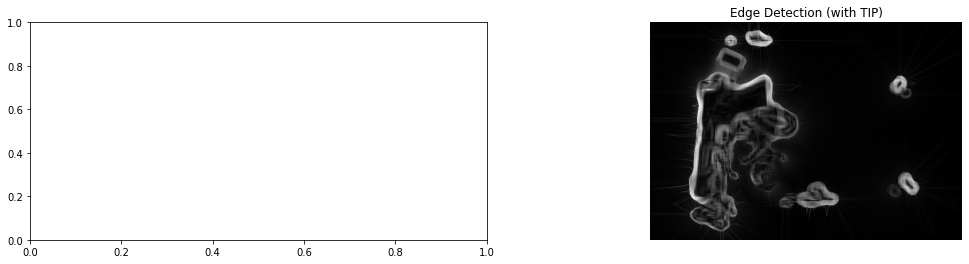

<Figure size 432x288 with 0 Axes>

In [30]:
import time
window_size = 25
border_width = 25
#...
img_gray = np.asarray(PIL.Image.fromarray((img).astype(np.uint8)).convert("L")).copy().astype("float") # grayscale
img_gray += 0.01 * np.random.randn(*img_gray.shape) # random noise
start_time = time.time()
TIP_img = TIP.topological_process_img(img_gray, window_size=window_size, border_width=border_width)
elapsed_time = time.time() - start_time
print("Time for Topological Image Processing: " + time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

sgm_without_TIP, contours_without_TIP = TIP.contour_segmentation(img_gray, return_contours=True)
sgm_with_TIP, contours_with_TIP = TIP.contour_segmentation(TIP_img["processed"], return_contours=True)
random.seed(42)
#....
fig, axes = plt.subplots(1, 2, figsize=(18, 4))
ax = axes.flatten()

ax[0].imshow(sgm_without_TIP, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Edge Detection (without TIP)", fontsize=12)
ax[0].imshow(img_gray, cmap="gray")
for contour in contours_without_TIP:
    ax[0].plot(contour[:,1], contour[:,0], color="red")
ax[0].set_axis_off()
ax[0].set_title("Isocontour (without TIP)", fontsize=12)
plt.imshow(img_gray, cmap="gray")
#...

sgm_without_TIP = roberts(img_gray)
sgm_with_TIP = roberts(TIP_img["processed"])

#...


fig, axes = plt.subplots(1, 2, figsize=(18, 4))
ax = axes.flatten()

ax[1].imshow(sgm_with_TIP, cmap="gray")
ax[1].set_axis_off()
ax[1].set_title("Edge Detection (with TIP)", fontsize=12)

plt.show()
plt.savefig('save_me.jpg')

In [31]:
np.set_printoptions(threshold=np.inf)
np.set_printoptions(suppress=True)


In [32]:
def display_image(image, image_stage):
    plt.imshow(image, cmap='gray')
    plt.title(image_stage)
    plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [33]:
def transformation_function(intensity):
    if 0 <= intensity < 30:
        new_intensity = 10
    elif 30 <= intensity < 60:
        new_intensity = 20
    elif 60 <= intensity < 90:
        new_intensity = 50
    elif 90 <= intensity < 120:
        new_intensity = 70
    elif 120 <= intensity < 160:
        new_intensity = 100
    elif 160 <= intensity < 190:
        new_intensity = 140
    elif 190 <= intensity < 220:
        new_intensity = 180
    elif 220 <= intensity <= 255:
        new_intensity = 200
    return new_intensity


def convert_image():
    img = cv2.imread("save_me.jpg", 0)
    img_rows = img.shape[0]
    image_columns = img.shape[1]
    print("The shape of the input image is " + str(img_rows) + " x " + str(image_columns) + " pixels.")

    display_image(img, "Input Image")

    new_image = np.zeros([img.shape[0], img.shape[1]])
    for row in range(img_rows):
        for column in range(image_columns):
            input_intensity = img[row][column]
            output_intensity = transformation_function(input_intensity)
            new_image[row][column] = output_intensity

    new_image_rows = new_image.shape[0]
    new_image_columns = new_image.shape[1]
    print("The shape of the output image is " + str(new_image_rows) + " x " + str(new_image_columns) + " pixels.")
    
    display_image(new_image, "Output Image")    

In [34]:
original = img
original_const = original

In [35]:
im = Image.open("save_me.jpg")
rgb2xyz = (
    0.312453, 0.257580, 0.380423, 0,
    0.212671, 0.715160, 0.172169, 0,
    0.019334, 0.19193, 0.950227, 0 )
out = im.convert("RGB", rgb2xyz)
coloured = cv2.cvtColor(np.array(out), cv2.COLOR_RGB2BGR)

In [36]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

### Color Correction

First of all, the green channel must be modified because it's too intense.



(<matplotlib.axes._subplots.AxesSubplot at 0x7f1384d1bf10>,
 (-0.5, 967.5, 674.5, -0.5),
 Text(0.5, 1.0, 'Gamma = 1.1'))

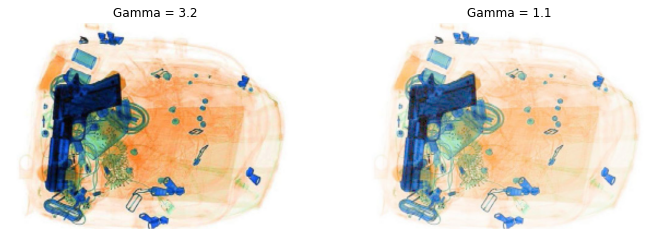

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
gamma = 1.1
adjusted = adjust_gamma(original, gamma=gamma)
plt.subplot(132), plt.imshow(adjusted), plt.axis('off'), plt.title('Gamma = 3.2')

gamma = 2.0
adjusted = adjust_gamma(original, gamma=gamma)
plt.subplot(133), plt.imshow(adjusted), plt.axis('off'), plt.title('Gamma = 1.1')


# Gamma levels
These next few boxes are important becaues this is where we contol how light and dark we apply our correction.

Be warned not all correction will work the same.

Some picture may look better with higher gamma and some may look better with low.

### Contrast & Brightness

Brightness factor must be carefully changed so that small details won't be overbrightened.

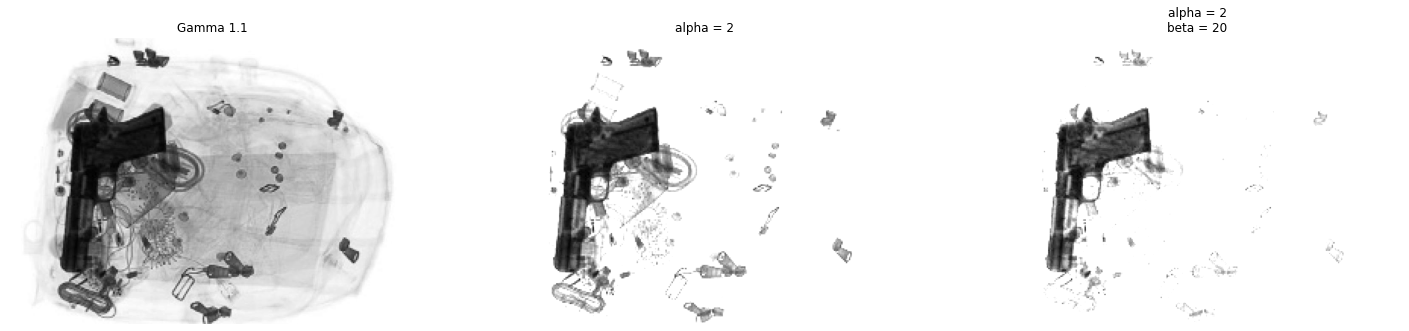

In [38]:
img = cv2.imread('/content/drive/MyDrive/images to test/image4.JPG',0) # loads in grayscale
fig, axes = plt.subplots(1, 3, figsize=(25,15))
plt.subplot(131), plt.imshow(img, cmap='gray'),plt.axis('off'), plt.title('Gamma 1.1')

alpha = 2.0
res = cv2.multiply(img, alpha)
plt.subplot(132), plt.imshow(res, cmap='gray'), plt.axis('off'), plt.title('alpha = 2')

beta = 97
res = cv2.add(res, beta)
plt.subplot(133), plt.imshow(res, cmap='gray'), plt.axis('off'), plt.title('alpha = 2\nbeta = 20')

plt.show()

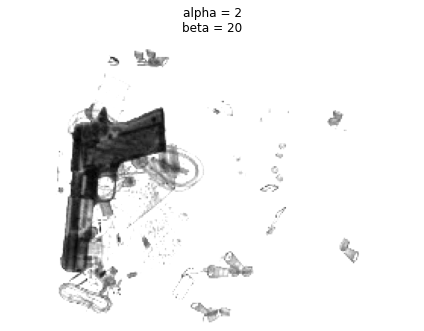

In [39]:
fig, axes = plt.subplots(1,  figsize=(25,15))
alpha = 2.0
res = cv2.multiply(img, alpha)
beta = 30
res = cv2.add(res, beta)
plt.subplot(133), plt.imshow(res, cmap='gray'), plt.axis('off'), plt.title('alpha = 2\nbeta = 20')

plt.show()

# Now Combined All The Methods



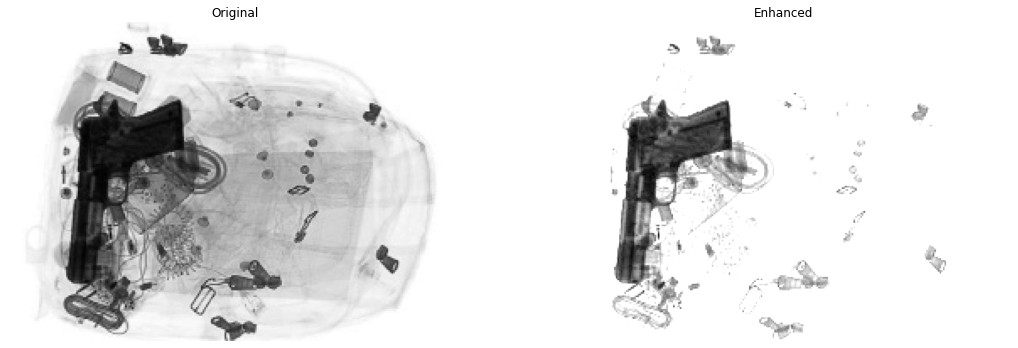

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(18,8))

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.axis('off'), plt.title('Original')

adjusted = adjust_gamma(res, gamma=1.5)
plt.subplot(122), plt.imshow(adjusted, cmap='gray'), plt.axis('off'), plt.title('Enhanced')

plt.show()

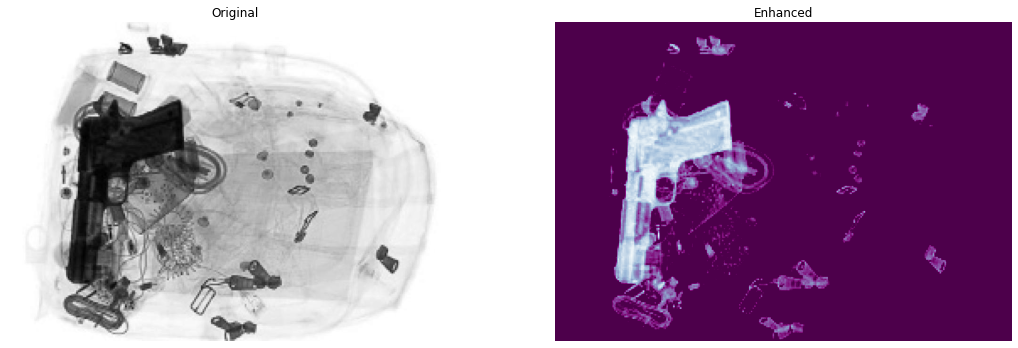

In [41]:
fig, axes = plt.subplots(1, figsize=(18,8))

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.axis('off'), plt.title('Original')

adjusted = adjust_gamma(res, gamma=1.5)
plt.subplot(122), plt.imshow(adjusted, cmap='BuPu'), plt.axis('off'), plt.title('Enhanced')


fig.savefig('save_me.jpeg', bbox_inches='tight')

# Now, to perform object detection.
We will be using a machine learning model that we trained in a separate notebook for conciseness.


In [25]:
# load the machine learning model
model = core.Model.load('/content/drive/MyDrive/300_pistol_imgs/model_weights.pth', ['pistol'])

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

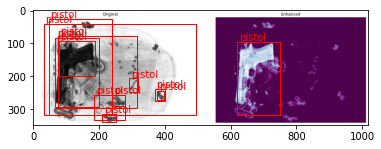

In [42]:
# read an image from the path and make predictions on it.
image = utils.read_image('save_me.jpeg') 
predictions = model.predict(image)
labels, boxes, scores = predictions

# remove the unwanted boxes with thresh. the higher the number, the less boxes.
thresh = 0.2

filtered_indices=np.where(scores>thresh)
filtered_scores=scores[filtered_indices]
filtered_boxes=boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [labels[i] for i in num_list]
show_labeled_image(image, filtered_boxes, filtered_labels)
